# Class 9: Solving Systems of Nonlinear Equations with Newton-type Methods
CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## 9d. Inexact Newton

What if we do not know the derivative of the function?  We can do what is called inexact Newton and estimate the derivative using a **finite difference formula**:

$$f'(x_i) \approx \frac{f(x_i + \delta) - f(x_i)}{\delta},$$ 

which will converge to the derivative as $\delta \rightarrow 0$. Indeed, the limit of this approximation as $\delta \rightarrow 0$ is the definition of a derivative. To implement this we need to only make a small change to the code to estime the derivative instead of calling a derivative function.  The downside is that we need an extra function evaluation to estimate the derivative.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Finish the function below. Hint: You'll find the formula above helpful.
</div>

In [25]:
-

### 9d-i. Unit Test

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Now test your code using the unit test below. Then speculate as to how many times your code evaluated the nonlinear function.
</div>

In [26]:
root = inexact_newton(nonlinear_function,-1.5,delta = 1.0e-7, epsilon=1.0e-6, LOUD=True,max_iter=15)

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.249998846883045 = 0.45945970372823863
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.2622315992416588 = -16.640501844574604
x_ 3 = -16.640501844574604 - -13206.564357107398 / 2420.594719296787 = -11.184584647108327
x_ 4 = -11.184584647108327 - -3911.2918349345796 / 1076.1160501715494 = -7.54994706846515
x_ 5 = -7.54994706846515 - -1159.3263333064642 / 477.81551529624267 = -5.123641734726272
x_ 6 = -5.123641734726272 - -345.39137036052114 / 210.77077121844923 = -3.4849355309967853
x_ 7 = -3.4849355309967853 - -105.25705162502234 / 90.36323575628558 = -2.320113900340418
x_ 8 = -2.320113900340418 - -35.10059526280932 / 34.16589905214096 = -1.2927563234406585
x_ 9 = -1.2927563234406585 - -16.675217007438032 / 4.869943950325251 = 2.1313522859252334
x_ 10 = 2.1313522859252334 - 7.47460644110005 / 44.40937431127168 = 1.9630408301341777
x_ 11 = 1.9630408301341777 - 0.5857605234894905 / 37.533928995969745 = 1.9474346695440516
x_ 12 = 1.9474346695440516 

Notice that we get the same answer and it took the same number of iterations as `newton`.

The autograder will now test the `inexact_newton` code.

In [27]:
### BEGIN HIDDEN TESTS
def f_test(x):
    #compute a nonlinear function for demonstration
    return 3*x**3 + 2*x**2 - 5*x-20

def df_test(x):
    #compute a nonlinear function for demonstration
    return 9*x**2 + 4*x - 5

root_test = inexact_newton(f_test,-1.5,LOUD=False,max_iter=15)

assert np.abs(root_test - 1.947305244673835) < 1E-4, "Your function newton did not work for the test cubic."
### END HIDDEN TESTS

It took 12 iterations


Notice that we get the same answer and it took the same number of iterations.

**Discussion Question**: How many times did ``inexact_newton`` evaluate $c(x)$ for the unit test above?

## 9e. Secant Method

The secant method is a variation on the theme of Newton's method. In this case we use the previous two guesses to construct the slope:

$$f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}.$$ 

The benefit of this is that it **does not require an additional function evaluation**. This will be a big savings if it takes a long time to do a function evaluation. One issue is that we need two points to get started.  Therefore, we can use **inexact Newton for the first step** and then **use secant from then on**.  Below is a graphical example.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, walk through the example below. Flip a figurative coin to decide who is "Partner A" and who is "Partner B".
</div>

### 9e-i. Iteration 1

Inexact Newton Step

Initial Guess = 1.3


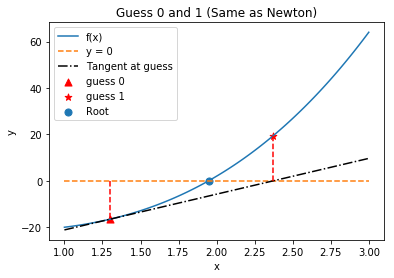

In [28]:
X = np.linspace(1,3,Np)
plt.plot(X,nonlinear_function(X),label="f(x)")
guess = 1.3
print("Initial Guess =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess 0",c="red", marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess 1",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1 (Same as Newton)")
plt.savefig("Secant-Methods1.pdf")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Partner A: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

### 9d-ii. Iteration 2

Secant Method

Guess 1 = 2.3727105503764285
Guess 2 = 1.7925464201668238


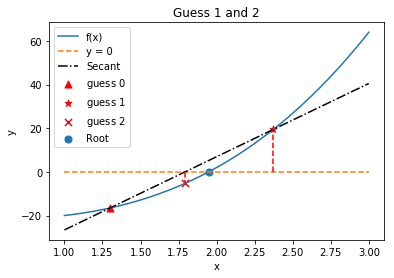

In [29]:
old_guess = guess
guess = new_guess
print("Guess 1 =",guess)
slope = (nonlinear_function(guess)-nonlinear_function(old_guess))/(guess - old_guess)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(old_guess) + slope*(X-old_guess),'k-.', label="Secant")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(old_guess,nonlinear_function(old_guess),label="guess $0$",c="red", marker="^", s=50)
plt.scatter(guess,nonlinear_function(guess),marker="*",label="guess $1$",c="red", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="x", label="guess $2$",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.savefig("Secant-Methods2.pdf")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Swith roles! Partner B: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

### 9e-iii. Secant Method Algorithm

We can now generalize the secant method (similar to inexact Newton).

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Run the code below.
</div>

In [30]:
def secant(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    
    #first time use inexact Newton
    x_old = x
    fold = f(x_old)
    fx = fold
    slope = (f(x_old+delta) - fold)/delta
    x = x - fold/slope
    if (LOUD):
        print("Inexact Newton\nx_",1,"=",x,"-",fx,"/",slope,"=",
              x - fx/slope,"\nStarting Secant")
    fx = f(x)
    iterations = 1 
    
    # now switch to secant method
    while (np.fabs(fx) > epsilon):
        # recall fx, x correspond with the last point,
        # fold, and x_old correspond to the 2nd to last point
        ### SWITCH ROLES. Discuss this line in depth.
        slope = (fx - fold)/(x - x_old)
        
        # switch the history. overwrite fold with fx, etc.
        fold = fx
        x_old = x
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        
        # calculate new point
        x = x - fx/slope
        
        # evaluate function f at new point
        fx = f(x)
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: As a class, discuss the output below.
</div>

In [31]:
root = secant(nonlinear_function,-1.5,LOUD=True)

x0 = -1.5
Inexact Newton
x_ 1 = 0.45945970372823863 - -18.125 / 9.249998846883045 = 2.4189194074564773 
Starting Secant
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.7653396012704734 = -11.767146325248616
x_ 3 = -11.767146325248616 - -4572.272414110397 / 372.19554564146875 = 0.517451025937337
x_ 4 = 0.517451025937337 - -21.636092826944633 / 370.4343081984803 = 0.5758583935814591
x_ 5 = 0.5758583935814591 - -21.64317999154791 / -0.1213402501968484 = -177.79183045192954
x_ 6 = -177.79183045192954 - -16795875.77015077 / 94164.21906726681 = 0.5760882386351796
x_ 7 = 0.5760882386351796 - -21.643113428270524 / 94164.09772754615 = 0.5763180832782079
x_ 8 = 0.5763180832782079 - -21.643046105986738 / 0.29290342772317585 = 74.46772411503576
x_ 9 = 74.46772411503576 - 1249567.865555407 / 16911.161604699413 = 0.5775978916445297
x_ 10 = 0.5775978916445297 - -21.642657354146493 / 16911.454507939132 = 0.5788776548573265
x_ 11 = 0.5788776548573265 - -21.64224503667768 / 0.32218262307570056 = 67

Secant is not quite as good as Newton (it took an additional iteration), but it does not need to know the derivative. Additionally, as mentioned above, there are fewer function evaluations (per iteration) than inexact Newton.

Newton's method, including it's inexact variant, and the secant method can both converge slowly in the presence of the following:
<ul>
<li>Multiple roots or closely spaced roots
<li>Complex roots
<li>Bad initial guess (we saw this one already in the example where the guesses went the wrong way at first)
</ul>

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Note</b>: There are no Home Activities in this section. We will walk through the examples quickly in class together.
</div>

### 9f-i. Example 1: Multiple Roots, overlapping

The function $$f(x) = x^7$$ has multiple roots at 0. Let's see how it converges with Newton.

Notice I switch from $c(x) = 0$ to $f(x) = 0$. People use them interchangeably for canonical form.

In [32]:
# define function
mult_root = lambda x: 1.0*x**7

# define first derivative
Dmult_root = lambda x: 7.0*x**6

# solve with Newton's method
root = newton(mult_root,Dmult_root,1.0,epsilon=1.0e-12,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 1.0 / 7.0 = 0.8571428571428572
x_ 2 = 0.8571428571428572 - 0.33991667708911394 / 2.7759861962277634 = 0.7346938775510204
x_ 3 = 0.7346938775510204 - 0.11554334736330486 / 1.1008713373781547 = 0.6297376093294461
x_ 4 = 0.6297376093294461 - 0.03927511069548781 / 0.43657194805493627 = 0.5397750937109538
x_ 5 = 0.5397750937109538 - 0.013350265119917321 / 0.1731311002086809 = 0.4626643660379604
x_ 6 = 0.4626643660379604 - 0.004537977757820996 / 0.0686585063310034 = 0.3965694566039661
x_ 7 = 0.3965694566039661 - 0.0015425343201428206 / 0.027227866546925984 = 0.3399166770891138
x_ 8 = 0.3399166770891138 - 0.0005243331403988625 / 0.01079774024099974 = 0.29135715179066896
x_ 9 = 0.29135715179066896 - 0.00017822957877208114 / 0.004282053979924045 = 0.2497347015348591
x_ 10 = 0.2497347015348591 - 6.058320617519827e-05 / 0.0016981318199673287 = 0.2140583156013078
x_ 11 = 0.2140583156013078 - 2.0593242130478076e-05 / 0.0006734272130863475 = 0.18347855622969242
x_ 12 = 0.183478

### 9f-ii. Example 2: Multiple roots, spaced far apart

Now consider

$$f(x) = \sin(x),$$

which has multiple roots that are spaced far apart. We'll see Newton's method converge fast in this case.

In [33]:
# define function
mult_root = lambda x: np.sin(x)

# define derivative
Dmult_root = lambda x: np.cos(x)

# call Newton's method
root = newton(mult_root,Dmult_root,1.0,LOUD=True, epsilon=1e-12)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 0.8414709848078965 / 0.5403023058681398 = -0.5574077246549021
x_ 2 = -0.5574077246549021 - -0.5289880970896319 / 0.8486292436261492 = 0.06593645192484066
x_ 3 = 0.06593645192484066 - 0.06588868458420974 / 0.9978269796130803 = -9.572191932508134e-05
x_ 4 = -9.572191932508134e-05 - -9.572191917890302e-05 / 0.9999999954186571 = 2.923566201412306e-13
It took 4 iterations
The root estimate is 2.923566201412306e-13 
f( 2.923566201412306e-13 ) = 2.923566201412306e-13


### 9f-iii. Example 3: Complex roots near the real root

For the case of complex roots let's consider a function that has complex roots near the actual root.  One such function is
$$ f(x) = x(x-1)(x-3) + 3.$$
The derivative of this function is 
$$ f'(x) =3x^3 - 8x  + 3.$$
The root is at $x= -0.546818$.

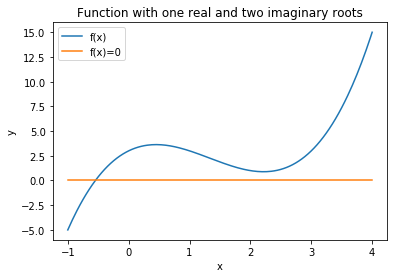

In [34]:
x = np.linspace(-1,4,200)
comp_root = lambda x: x*(x-1)*(x-3) + 3
d_comp_root = lambda x: 3*x**2 - 8*x + 3
plt.plot(x, comp_root(x),'-',label="f(x)")
plt.plot(x,0*x,label="f(x)=0")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function with one real and two imaginary roots")
plt.show()

In [35]:
root = newton(comp_root,d_comp_root,2.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 2.0
x_ 1 = 2.0 - 1.0 / -1.0 = 3.0
x_ 2 = 3.0 - 3.0 / 6.0 = 2.5
x_ 3 = 2.5 - 1.125 / 1.75 = 1.8571428571428572
x_ 4 = 1.8571428571428572 - 1.1807580174927113 / -1.5102040816326543 = 2.6389961389961383
x_ 5 = 2.6389961389961383 - 1.4385483817495095 / 2.780932752940469 = 2.1217062547914827
x_ 6 = 2.1217062547914827 - 0.9097213333636254 / -0.4687377434679618 = 4.062495845646789
x_ 7 = 4.062495845646789 - 16.218911005018263 / 20.01165072251795 = 3.2520224254422248
x_ 8 = 3.2520224254422248 - 4.845718347978311 / 8.71077016319959 = 2.69573196464577
x_ 9 = 2.69573196464577 - 1.6091181327603166 / 3.235056758472666 = 2.1983316861047486
x_ 10 = 2.1983316861047486 - 0.8881406969735082 / -0.08866688244154908 = 12.21493171215154
x_ 11 = 12.21493171215154 - 1265.3500398359906 / 352.89421650036365 = 8.629296185493123
x_ 12 = 8.629296185493123 - 373.6072839850617 / 157.35988848695354 = 6.255074345497114
x_ 13 = 6.255074345497114 - 109.99716055272572 / 70.33727043911153 = 4.691221215200477
x_ 14 = 

This converged slowly. This is because the complex roots at $x=2.2734\pm0.5638 i$ make the slope of the function change so that tangents don't necessarily point to a true root. 

We can see this graphically by looking at each iteration.

#### Iteration 1

Initial Guess = 2


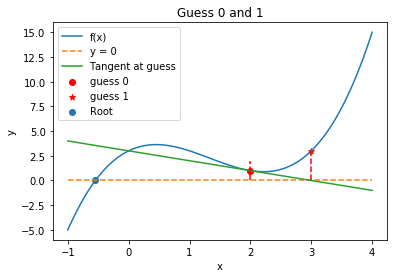

In [36]:
X = np.linspace(-1,4,Np)
plt.plot(X,comp_root(X),label="f(x)")
guess = 2
print("Initial Guess =",guess)
slope = d_comp_root(guess)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess 0",c="red")
new_guess = guess-comp_root(guess)/slope
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess 1",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.show()

#### Iteration 2

Guess 1 = 3.0
Guess 2 = 2.5


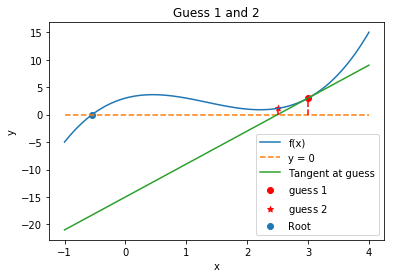

In [37]:
guess = new_guess
print("Guess 1 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $1$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $2$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.show()

#### Iteration 3

Guess 2 = 2.5
Guess 3 = 1.8571428571428572


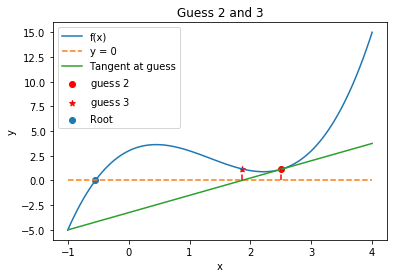

In [38]:
guess = new_guess
print("Guess 2 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $2$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 3 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $3$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 2 and 3")
plt.show()

Guess 3 = 1.8571428571428572
Guess 4 = 2.6389961389961383


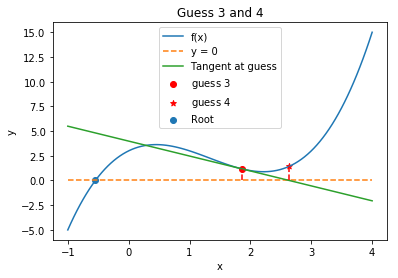

In [39]:
guess = new_guess
print("Guess 3 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $3$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 4 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $4$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 3 and 4")
plt.show()

Notice that the presence of the complex root causes the solution to oscillate around the local minimum of the function. Eventually, the method will converge on the root, but it takes many iterations to do so. The upside, however, is that it does eventually converge.